# **Algerian Forest Fires Dataset**
### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.


122 instances for each region.


The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

### **Data Cleaning**

In [5]:
# Missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [8]:
df['Region']=df['Region'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [10]:
# Removing missing values
df=df.drop(122).reset_index(drop=True)

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
# Removing the 122nd row
df=df.drop(122).reset_index(drop=True)

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [15]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [16]:
df=df.dropna().reset_index(drop=True)

In [17]:
[df.isnull().sum()]

[day            0
 month          0
 year           0
 Temperature    0
  RH            0
  Ws            0
 Rain           0
 FFMC           0
 DMC            0
 DC             0
 ISI            0
 BUI            0
 FWI            0
 Classes        0
 Region         0
 dtype: int64]

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
# Removing the spaces in columns names
df.columns=df.columns.str.strip()

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


#### **Changes the require columns as a integer data type**

In [23]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


#### **Changing the other columns to float data type**

In [25]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [27]:
# Saving the cleaned dataset
df.to_csv('Algerian_Forest_Fire_Cleaned_Dataset.csv',index=False)

#### **Exploratory Data Analysis**

In [28]:
# Drop the day, month, year columns
df=df.drop(['day','month','year'],axis=1)

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [31]:
# Encoding of the categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [32]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

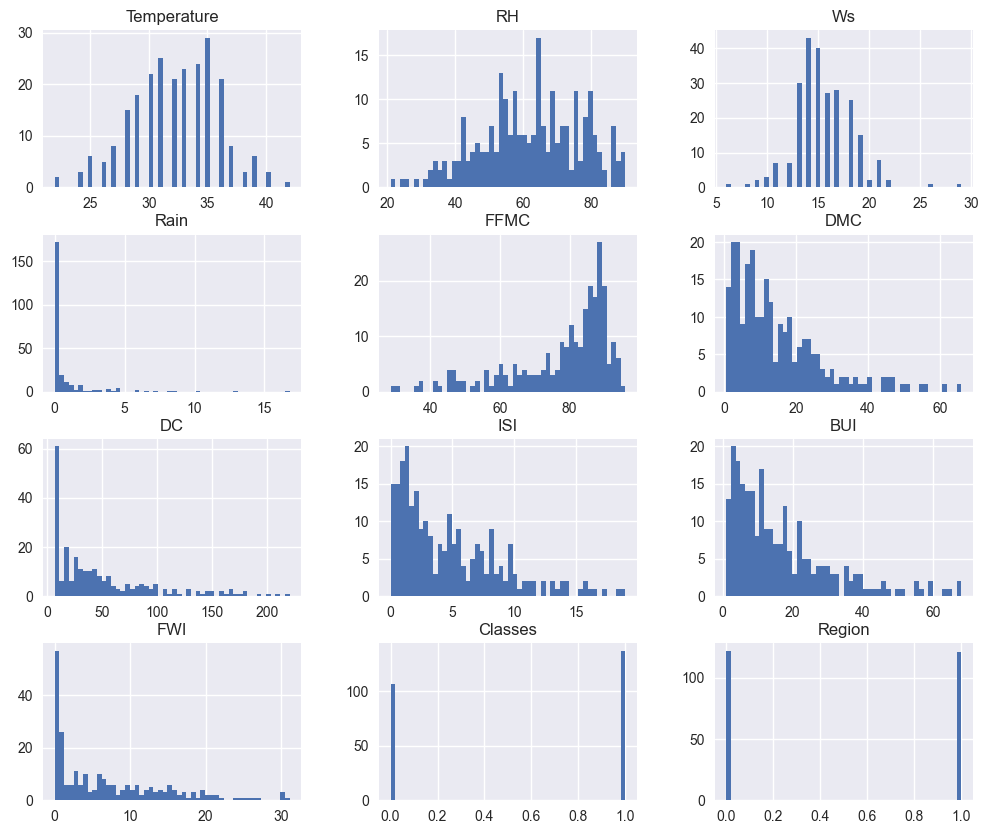

In [ ]:
# Polt density plot for all features
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(12,10))
plt.savefig('Histplot.png',dpi=300)
plt.show()

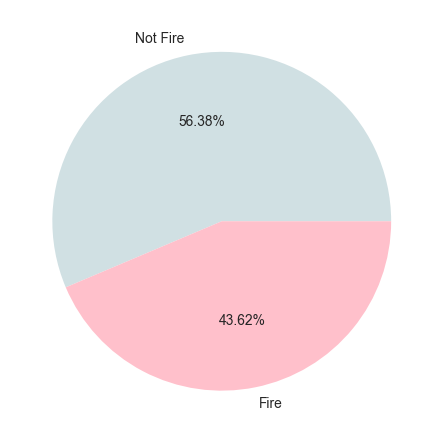

In [34]:
# Poltting piechart
percentage=df['Classes'].value_counts(normalize=True)*100
labels=['Not Fire','Fire']
plt.pie(percentage,labels=labels,autopct='%1.2f%%',colors=['#d0e0e3','pink'])
plt.savefig('Piechart.png',dpi=300)
plt.show()

In [35]:
# Correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


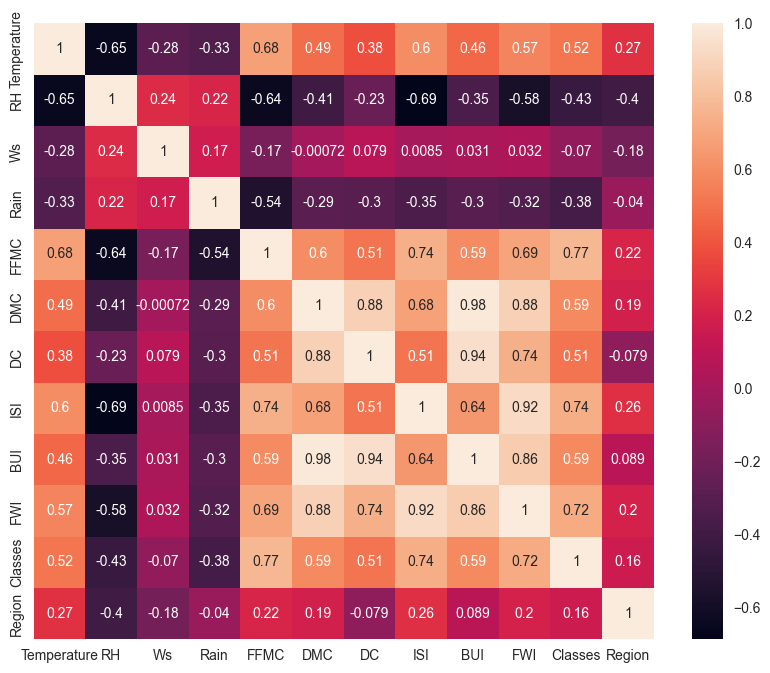

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.savefig("Heatmap.png",dpi=300)

<Axes: ylabel='FWI'>

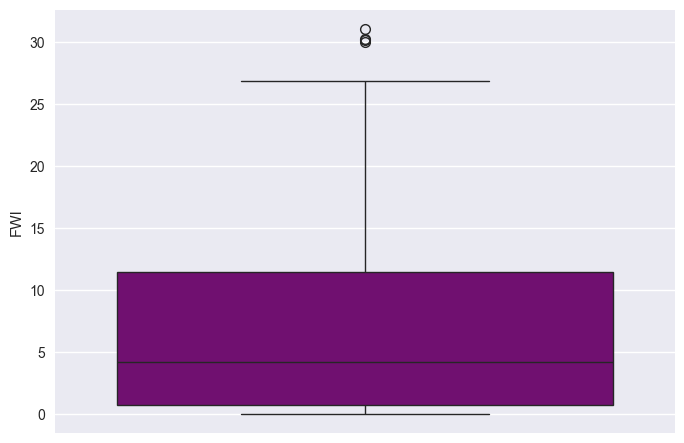

In [37]:
# Box plot
sns.boxplot(data=df['FWI'],color='purple')

In [38]:
# Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [39]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [40]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [41]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [43]:
# Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

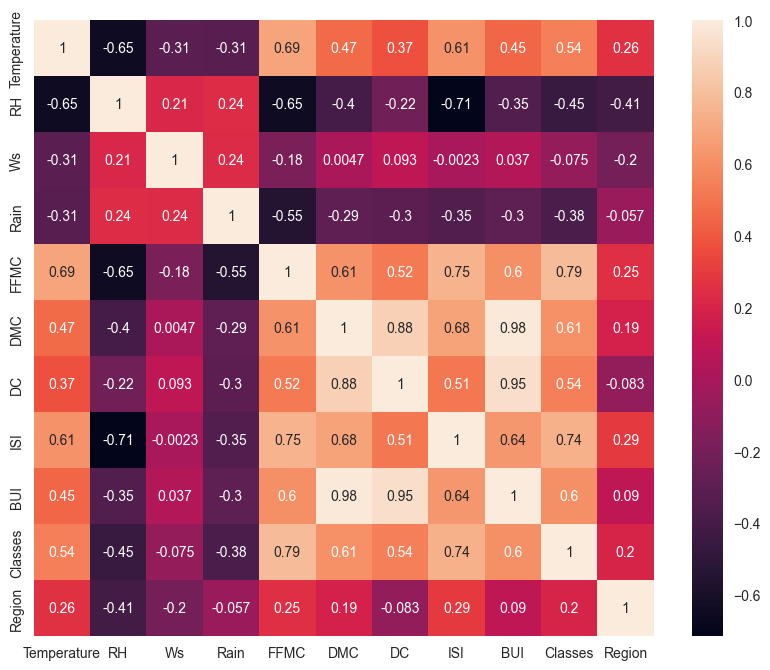

In [44]:
# Check for multicollinearity
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)

In [45]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [46]:
# Threshold
col = correlation(X_train,0.85)

In [47]:
# Drop features when threshold is more than 0.85
X_train.drop(col,axis=1,inplace=True)
X_test.drop(col,axis=1,inplace=True)

In [48]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [49]:
# Checking the Skewness of the features
X_train.skew()

Temperature   -0.211752
RH            -0.331607
Ws             0.372481
Rain           4.525577
FFMC          -1.229174
DMC            1.487047
ISI            1.072601
Classes       -0.272594
Region        -0.020781
dtype: float64

#### **Skewness Reduction or Log Transformation**

In [50]:
column=X_train.skew()>0.5
print(column)
col_to_log = ['Rain','DMC','ISI']
for col in col_to_log:
  X_train[col]=np.log1p(X_train[col])
  X_test[col]=np.log1p(X_test[col])

Temperature    False
RH             False
Ws             False
Rain            True
FFMC           False
DMC             True
ISI             True
Classes        False
Region         False
dtype: bool


In [51]:
X_train.skew()

Temperature   -0.211752
RH            -0.331607
Ws             0.372481
Rain           2.189029
FFMC          -1.229174
DMC           -0.145853
ISI           -0.042243
Classes       -0.272594
Region        -0.020781
dtype: float64

#### **Feature Scaling or Standardization**

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [54]:
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.78377762,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.49805751,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ...,  0.15665183,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.75193305,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.81485523,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -1.01376164,
        -1.14434427, -1.01036297]], shape=(194, 9))

#### **Box pot to understand effects of standard scaler**

In [55]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

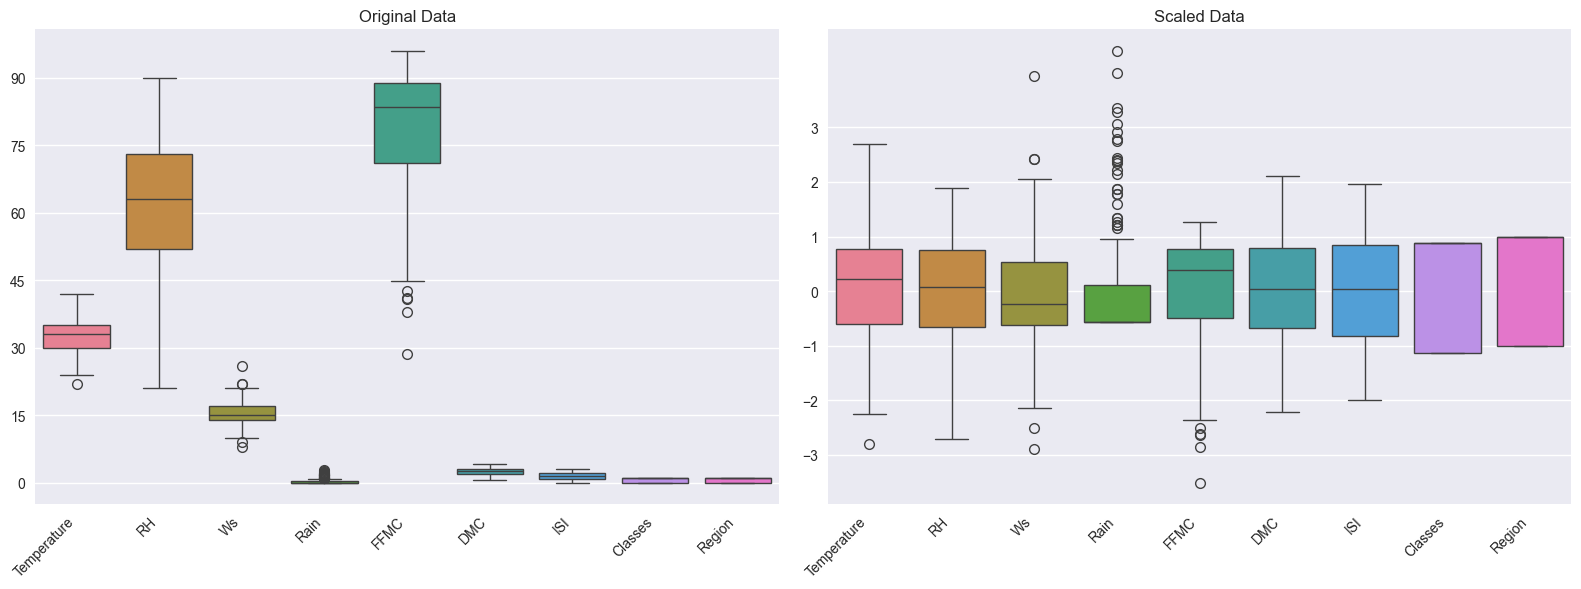

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=X_train, ax=ax1)
ax1.set_title("Original Data")
ax1.set_xticks(range(len(X_train.columns)))  # Fix x tick positions
ax1.set_xticklabels(X_train.columns, rotation=45, ha='right')  # Fix x tick labels

ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
sns.boxplot(data=X_train_scaled, ax=ax2)
ax2.set_title("Scaled Data")
ax2.set_xticks(range(len(X_train_scaled_df.columns)))
ax2.set_xticklabels(X_train_scaled_df.columns, rotation=45, ha='right')

# Set custom y ticks for scaled data (e.g., -3 to 3)
ax2.set_yticks([-3, -2, -1, 0, 1, 2, 3])
plt.tight_layout()
plt.savefig("Boxplts.png",dpi=300)
plt.show()

### **Linear Regression Model**

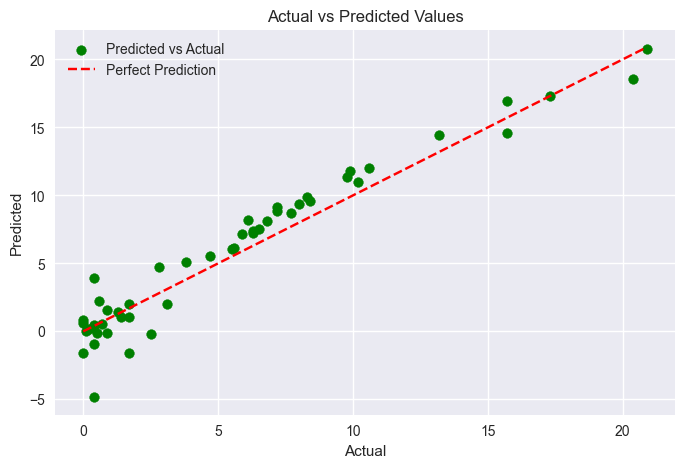

In [57]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.savefig("ActualVsPredicted.png",dpi=300)
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae =  mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Squared Error: 2.3840028036635332
Mean Absolute Error: 1.1981620718254873
R2 Score: 0.9213419014788387


### **Lasso , Ridge , ElesticNet Models**

In [59]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [60]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elastic Net' : ElasticNet()
}

In [61]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_r2 = r2_score(y_train,y_train_pred)

    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_r2 = r2_score(y_test,y_test_pred)
    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score : {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Mean Abosolute Error: {:.4f}'.format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print('- R2 Score : {:.4f}'.format(model_test_r2))
    print('='*35,'\n')

Linear Regression
Model performance for Training set
- Mean Absolute Error: 1.5268
- Mean Squared Error: 4.5500
- R2 Score : 0.9250
----------------------------------
Model performance for Test set
- Mean Abosolute Error: 1.1982
- Mean Squared Error: 2.3840
- R2 Score : 0.9213

Lasso
Model performance for Training set
- Mean Absolute Error: 3.1980
- Mean Squared Error: 16.9392
- R2 Score : 0.7208
----------------------------------
Model performance for Test set
- Mean Abosolute Error: 3.0259
- Mean Squared Error: 13.9471
- R2 Score : 0.5398

Ridge
Model performance for Training set
- Mean Absolute Error: 1.5570
- Mean Squared Error: 4.6570
- R2 Score : 0.9232
----------------------------------
Model performance for Test set
- Mean Abosolute Error: 1.2312
- Mean Squared Error: 2.3311
- R2 Score : 0.9231

Elastic Net
Model performance for Training set
- Mean Absolute Error: 3.4493
- Mean Squared Error: 19.4105
- R2 Score : 0.6801
----------------------------------
Model performance for T

In [69]:
import joblib

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    joblib.dump(model, f"{name.lower().replace(' ', '_')}.pkl")

joblib.dump(scaler,'standardscalar.pkl')

['standardscalar.pkl']